In [6]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from matplotlib import rc
rc('font',**{'family':'libertine'})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{scalerel,stackengine,amsmath,amssymb}')


In [17]:
from scipy.stats import norm

In [126]:
sns.set_style("whitegrid")
size = 3
alpha = 0.30
lw = 1

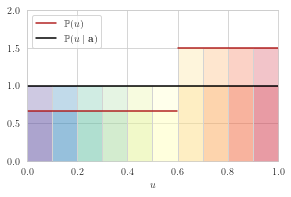

In [140]:
fig, ax = plt.subplots(figsize=(1.5 * size, size))

t = np.arange(0.0, 1.1, 0.1)
color = list(cm.Spectral(np.linspace(0, 1, len(t))))
x = np.linspace(0.0, 1.0, 1000)

xx = t[None, ] - 1.0 + 0.0 * x[:, None]
yy = 1.0 - np.abs(x)[:, None] - 0.0 * t[None, :]
ax.plot(1 + xx, yy, c='lightgrey', lw=lw)

for i in range(len(t) - 1):
    ax.fill_between(t[i:(i+2)], 1.0 - 0.0 * t[i:(i+2)], [0.0, 0.0], color=color[len(t) - i - 1], 
                    alpha=alpha)

# gamma = 1.5, q = 0.6
# for gamma, band, c in zip([7 / 3, 1.5], [7, 6], ['cornflowerblue', 'firebrick']):
for gamma, band, c in zip([1.5], [6], ['firebrick']):
    
    xx = t[None, band:] - 1.0 + 0.0 * x[:, None]
    yy = gamma - np.abs(x)[:, None] - 0.0 * t[None, band:]
    ax.plot(1 + xx, yy, c='lightgrey', lw=lw)
    
    for i in range(band):
        ax.fill_between(t[i:(i+2)], 1/gamma - 0.0 * t[i:(i+2)], [0.0, 0.0], color=color[len(t) - i - 1], 
                        alpha=alpha)
    for i in range(band, len(t) - 1):
        ax.fill_between(t[i:(i+2)], gamma - 0.0 * t[i:(i+2)], [0.0, 0.0], color=color[len(t) - i - 1], 
                        alpha=alpha)
    ax.plot(x, 0.0 * x + np.where(x <= gamma / (1 + gamma), 1/gamma, np.nan), c=c, label='$\\mathbb{P}(u)$')
    ax.plot(x, 0.0 * x + np.where(x > gamma / (1 + gamma), gamma, np.nan), c=c)
    
    
ax.plot(x, 0.0 * x + 1.0, c='k', label='$\\mathbb{P}(u \\mid \\mathbf{a})$')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 2.0)
ax.set_aspect(0.3)

plt.xlabel("$u$")
plt.legend()
plt.grid(True)

plt.savefig('unobs.svg', bbox_inches = 'tight', pad_inches = 0)

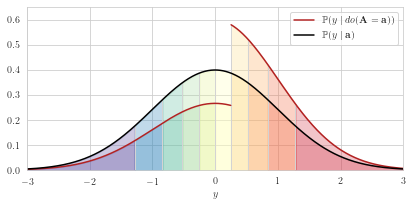

In [143]:
fig, ax = plt.subplots(figsize=(3 * size, size))

t = np.arange(0.0, 1.1, 0.1)
color = list(cm.Spectral(np.linspace(0, 1, len(t))))
x = np.linspace(-3.0, 3.0, 1000)

xx = norm.ppf(t[None, ]) + 0.0 * x[:, None]
yy = norm.pdf(xx) - x[:, None] - 3.0
ax.plot(xx, yy, c='lightgrey', lw=lw)

for i in range(len(t) - 1):
    ax.fill_between(norm.ppf(t[i:(i+2)]), norm.pdf(norm.ppf(t[i:(i+2)])), [0.0, 0.0], color=color[len(t) - i - 1], 
                    alpha=alpha)

x_l = np.linspace(-3.0, norm.ppf(t[1]), 50)
ax.fill_between(x_l, norm.pdf(x_l), np.zeros((50,)), color=color[-1], alpha=alpha)
x_r = np.linspace(norm.ppf(t[-2]), 3.0, 50)
ax.fill_between(x_r, norm.pdf(x_r), np.zeros((50,)), color=color[1], alpha=alpha)


gamma = 1.5
xx = norm.ppf(t[None, band:]) + 0.0 * x[:, None]
yy = gamma * norm.pdf(xx) - x[:, None] - 3.0
ax.plot(xx, yy, c='lightgrey', lw=lw)

ax.plot(x, 0.0 * x + np.where(x > norm.ppf(gamma / (1 + gamma)), gamma * norm.pdf(x), np.nan), c='firebrick', 
       label='$\\mathbb{P}(y \\mid do(\\mathbf{A} = \\mathbf{a}))$')
ax.plot(x, 0.0 * x + np.where(x <= norm.ppf(gamma / (1 + gamma)), 1 / gamma * norm.pdf(x), np.nan), c='firebrick')

for i in range(band):
    ax.fill_between(norm.ppf(t[i:(i+2)]), 1 / gamma * norm.pdf(norm.ppf(t[i:(i+2)])), [0.0, 0.0], color=color[len(t) - i - 1], 
                    alpha=alpha)
for i in range(band, len(t) - 1):
    ax.fill_between(norm.ppf(t[i:(i+2)]), gamma * norm.pdf(norm.ppf(t[i:(i+2)])), [0.0, 0.0], color=color[len(t) - i - 1], 
                    alpha=alpha)
x_l = np.linspace(-3.0, norm.ppf(t[1]), 50)
ax.fill_between(x_l, 1 / gamma * norm.pdf(x_l), np.zeros((50,)), color=color[-1], alpha=alpha)
x_r = np.linspace(norm.ppf(t[-2]), 3.0, 50)
ax.fill_between(x_r, gamma * norm.pdf(x_r), np.zeros((50,)), color=color[1], alpha=alpha)


ax.plot(x, norm.pdf(x), c='k', label='$\\mathbb{P}(y \\mid \\mathbf{a})$')
# ax.plot(x, norm.pdf(x), c='firebrick', label='$\\mathbb{P}(y \\mid \\mathbf{a})$')

ax.set_xlim(-3.0, 3.0)
ax.set_ylim(0.0, 0.65)
ax.set_aspect(4.0)

plt.xlabel("$y$")
plt.legend()
plt.grid(True)
plt.savefig('obs.svg', bbox_inches = 'tight', pad_inches = 0)